
# K Means Clustering Project 

Using KMeans Clustering to cluster Universities into to two groups: Private and Public.

## The Data

Data frame has 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the Data

In [2]:
# load file as dataframe
df = pd.read_csv('College_Data', index_col=0)

In [3]:
df.sample(7)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Murray State University,No,2225,1910,1190,29,55,5968,955,4738,3110,700,940,72,76,20.2,27,5972,52
Oklahoma State University,No,4522,3913,2181,29,57,12830,1658,5336,3344,800,3100,84,92,15.3,14,6433,48
Washington College,Yes,1209,942,214,31,60,822,46,15276,5318,500,300,79,86,11.2,37,10830,65
Whittier College,Yes,1681,1069,344,35,63,1235,30,16249,5699,500,1998,84,92,13.6,29,11778,52
Valparaiso University,Yes,2075,1727,520,49,81,2501,198,11800,3260,500,800,87,89,14.2,23,9681,95
University of Alabama at Birmingham,No,1797,1260,938,24,35,6960,4698,4440,5175,750,2200,96,96,6.7,16,16352,33
University of Dayton,Yes,6361,5293,1507,26,51,5889,665,11380,4220,500,900,81,85,14.8,25,8894,93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [5]:
df.describe(include='all')

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


## EDA

** Creating a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

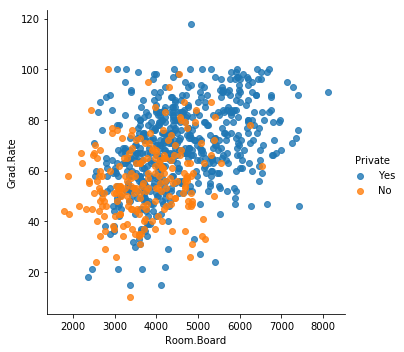

In [6]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=False)

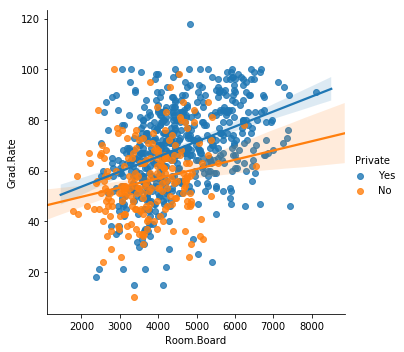

In [7]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=True)

**Creating a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

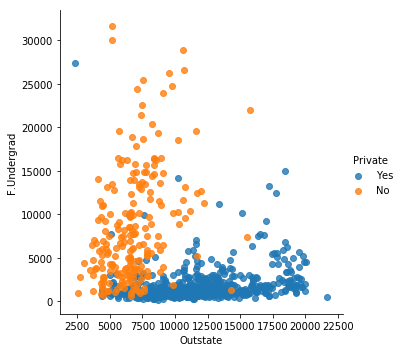

In [8]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private', fit_reg=False)

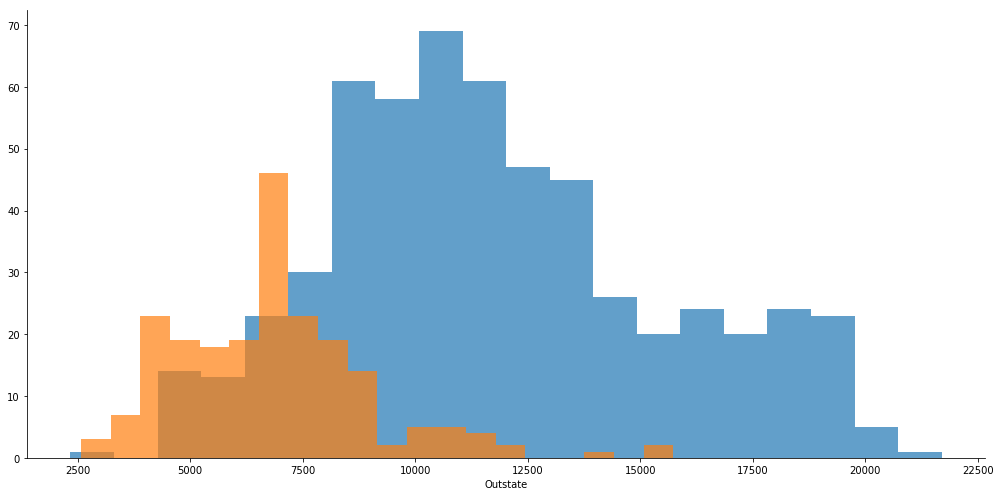

In [9]:
g = sns.FacetGrid(df, hue='Private', height=7, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

**Creating a similar histogram for the Grad.Rate column.**

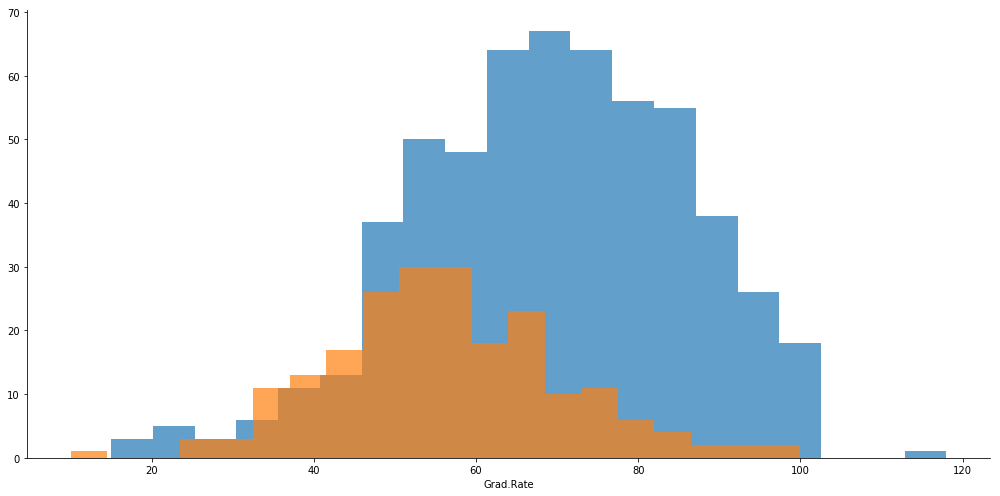

In [10]:
g = sns.FacetGrid(df, hue='Private', height=7, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [11]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [12]:
df['Grad.Rate']['Cazenovia College'] = 100

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


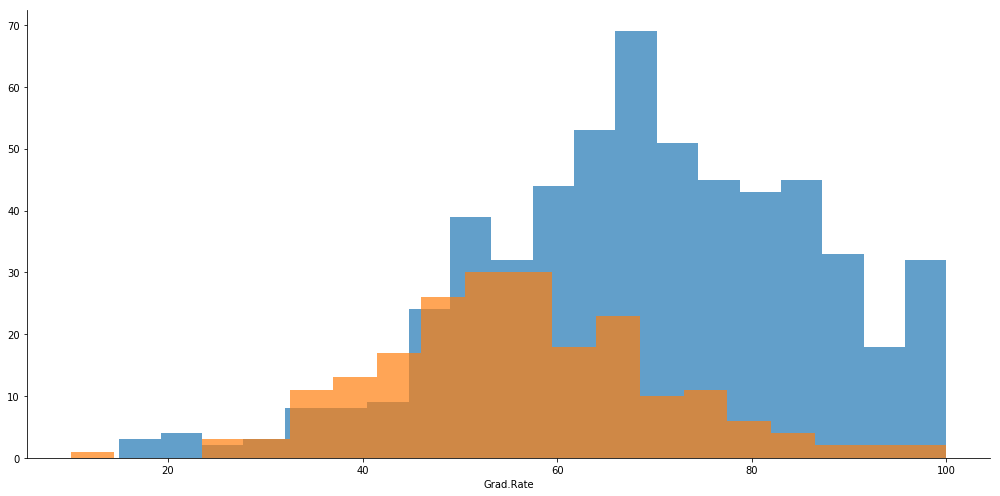

In [13]:
g = sns.FacetGrid(df, hue="Private", height=7, aspect=2)
g = g.map(plt.hist, 'Grad.Rate',bins=20, alpha=0.7)

## K Means Cluster Creation

In [14]:
from sklearn.cluster import KMeans

** Creating an instance of a K Means model with 2 clusters.**

In [15]:
kmeans = KMeans(n_clusters=2)

**Fitting the model to all the data except for the Private label.**

In [16]:
kmeans.fit(df.drop('Private', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

** Creating a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [18]:
# converter -> cluster
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [19]:
df['Cluster'] = df['Private'].apply(converter)

In [20]:
df.sample(7)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Marquette University,Yes,5152,4600,1685,36,71,7016,804,11610,4760,600,1950,86,94,13.5,25,9982,77,1
Marymount Manhattan College,Yes,695,535,239,21,30,988,785,10200,7000,350,1100,63,76,11.7,20,10622,68,1
Seattle Pacific University,Yes,1183,1016,411,42,82,1922,704,12669,4875,600,1250,83,85,16.8,20,10368,66,1
University of Maryland at Baltimore County,No,4269,2594,985,27,57,6476,2592,8594,4408,494,2768,82,88,18.4,6,7618,55,0
Taylor University,Yes,1769,1092,437,41,80,1757,81,10965,4000,450,1250,60,61,14.2,32,8294,98,1
Nazareth College of Rochester,Yes,947,798,266,36,68,1274,471,10850,5150,550,800,77,93,13.6,24,8797,61,1
Blackburn College,Yes,500,336,156,25,55,421,27,6500,2700,500,1000,76,76,14.3,53,8377,51,1


In [21]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

** Creating a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df['Cluster'], kmeans.labels_))
print(classification_report(df['Cluster'], kmeans.labels_))

[[138  74]
 [531  34]]
             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777

